CV-Messung für kom. LED

Fit für LED Rot: a = -113265673140886765568.0000, b = 2.8120e+20
Fit für LED Orange: a = -208259203256976277504.0000, b = 5.0027e+20
Fit für LED Grün: a = -405592269394582044672.0000, b = 2.1373e+21
Fit für LED Weiß: a = -374630158720253165568.0000, b = 4.1118e+20


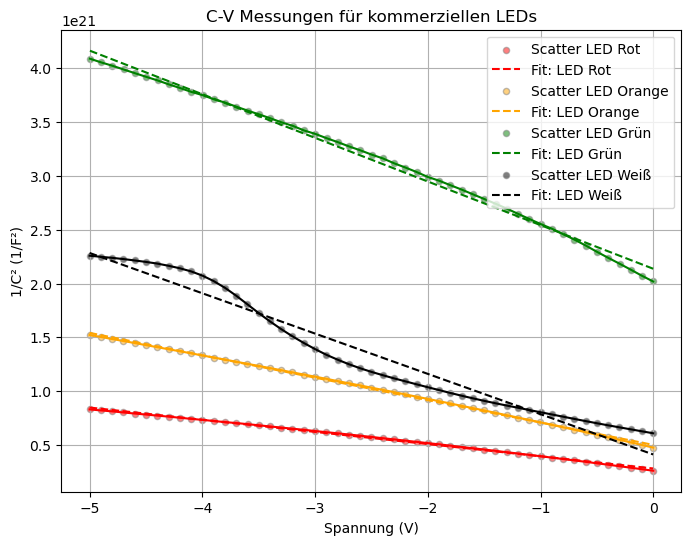

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

ordner_pfad = '/Users/naebaekhap/FP_Protokoll_Kim/FP_Messdaten/F13/Messdaten/3.Aufgabe'

dateien = [f for f in os.listdir(ordner_pfad) if f.endswith('.csv')]

plt.figure(figsize=(8, 6))  # Erstelle eine Figure für die Plots

# Zuordnung von Dateinamen zu Farben
info = {
    'CV_rot.csv': {'farbe': 'red', 'label': 'LED Rot'},
    'CV_orange.csv': {'farbe': 'orange', 'label': 'LED Orange'},
    'CV_gruen.csv': {'farbe': 'green', 'label': 'LED Grün'},   
    'CV_weiss.csv': {'farbe': 'black', 'label': 'LED Weiß'}
}

for datei in dateien:
    # Vollständiger Pfad zur Datei
    voller_pfad = os.path.join(ordner_pfad, datei)
    
    # Lese die CSV-Datei, überspringe die ersten zwei Zeilen und setze den Delimiter auf Tab
    daten = pd.read_csv(voller_pfad, delimiter='\t', skiprows=2, header=None)
    
    # Spaltennamen manuell
    daten.columns = ['Frequency', 'Capacitance', 'Resistance', 'VAC', 'IAC', 'VDC', 'IDC', 'Time', 'Impedance', 'Temperature']
    
    # Berechne 1/C^2 
    daten['1/C^2'] = 1 / daten['Capacitance']**2

    farbe = info[datei]['farbe']
    label = info[datei]['label']
    
    # 라인
    plt.plot(daten['VDC'], daten['1/C^2'], color=farbe)
    
    # 점점이 알파 값으로 투명도
    plt.scatter(daten['VDC'], daten['1/C^2'], color=farbe, edgecolor='grey', alpha=0.5, s=20, label=f'Scatter {label}')

  # Führe eine lineare Regression durch
# Führe eine lineare Regression durch
    fit_params = np.polyfit(daten['VDC'], daten['1/C^2'], 1)
    a, b = fit_params[0], fit_params[1]
    fit_line = a * daten['VDC'] + b

        # Zeichne die Fit-Linie
    plt.plot(daten['VDC'], fit_line, label=f"Fit: {info[datei]['label']}", color=info[datei]['farbe'], linestyle='--')

        # Ausgabe der Fit-Parameter
    print(f"Fit für {info[datei]['label']}: a = {a:.4f}, b = {b:.4e}")



plt.title('C-V Messungen für kommerziellen LEDs')
plt.xlabel('Spannung (V)')
plt.ylabel('1/C² (1/F²)')
plt.legend()
plt.grid(True)
plt.show()


Fläche A Berechnung
Für die Figuren: 

In [9]:
def berechne_l_form_fläche(breite1, höhe1, breite2, höhe2):
    """
    Berechnet die Fläche einer L-förmigen Figur, die aus zwei Rechtecken besteht.
    
    Parameters:
    breite1, höhe1: Breite und Höhe des ersten Rechtecks
    breite2, höhe2: Breite und Höhe des zweiten Rechtecks
    
    Returns:
    Fläche der L-förmigen Figur
    """
    fläche1 = breite1 * höhe1
    fläche2 = breite2 * höhe2
    
    # Gesamtfläche berechnen, abhängig von der Positionierung der Rechtecke
    # Hier wird angenommen, dass sich die Rechtecke so überlappen, dass keine Fläche doppelt gezählt wird.
    gesamtfläche = fläche1 + fläche2
    
    return gesamtfläche

# Beispiel: Eingabe der Dimensionen
breite1 = 383.14  # Breite des ersten Rechtecks in Metern
höhe1 = 165.20  # Höhe des ersten Rechtecks in Metern
breite2 = 166.19  # Breite des zweiten Rechtecks in Metern
höhe2 = 382.62 - höhe1    # Höhe des zweiten Rechtecks in Metern

# Fläche berechnen
fläche = berechne_l_form_fläche(breite1, höhe1, breite2, höhe2)
print(f"Die Fläche der L-förmigen Figur beträgt {fläche} Quadratmikrometer.")

Die Fläche der L-förmigen Figur beträgt 99427.75779999999 Quadratmikrometer.


Für Quadrat

In [8]:
def berechne_quadrat_fläche(seitenlänge):
    """
    Berechnet die Fläche eines Quadrats anhand seiner Seitenlänge.
    
    Parameters:
    seitenlänge: Die Länge der Seiten des Quadrats
    
    Returns:
    Fläche des Quadrats
    """
    fläche = seitenlänge ** 2
    return fläche

# Liste von Seitenlängen für mehrere Quadrate
seitenlängen = [211.24, 161.88, 112.08]

# Berechne und drucke die Fläche für jede Seitenlänge
for länge in seitenlängen:
    fläche = berechne_quadrat_fläche(länge)
    print(f"Die Fläche des Quadrats mit der Seitenlänge {länge} beträgt {fläche} Quadratmeter.")

Die Fläche des Quadrats mit der Seitenlänge 211.24 beträgt 44622.337600000006 Quadratmeter.
Die Fläche des Quadrats mit der Seitenlänge 161.88 beträgt 26205.1344 Quadratmeter.
Die Fläche des Quadrats mit der Seitenlänge 112.08 beträgt 12561.9264 Quadratmeter.


Raumladungszonenbereite W=A/C

          LED  Spannung VDC  Breite W (µm)
0     LED Rot     -4.999770       3.079782
1     LED Rot     -4.899940       3.062154
2     LED Rot     -4.799850       3.045821
3     LED Rot     -4.700120       3.026829
4     LED Rot     -4.599480       3.007785
..        ...           ...            ...
199  LED Weiß     -0.399538       4.630584
200  LED Weiß     -0.299674       4.566786
201  LED Weiß     -0.200292       4.503166
202  LED Weiß     -0.100178       4.438304
203  LED Weiß     -0.000726       4.373103

[204 rows x 3 columns]


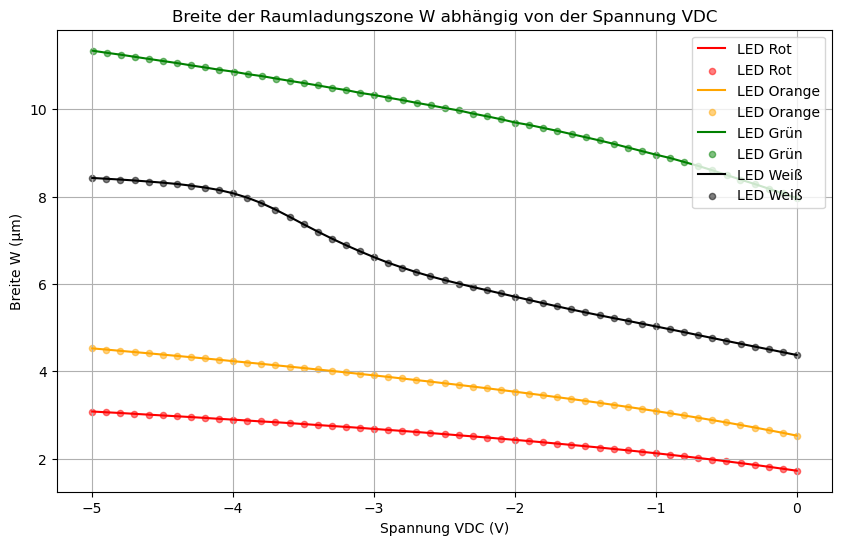

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Konstanten
e = 1.602e-19  # Elementarladung in Coulomb
permittivity = {
    'GaAs': 13.1 * 8.854e-12,  # Permittivität von GaAs in F/m
    'GaN': 8.9 * 8.854e-12    # Permittivität von GaN in F/m
}

# Flächen in Quadratmeter umrechnen
areas = {
    'CV_rot.csv': 921600 * 1e-12,
    'CV_orange.csv': 1000000 * 1e-12,
    'CV_gruen.csv': 2250000 * 1e-12,
    'CV_weiss.csv': 2250000 * 1e-12
}

# Materialzuordnung
material_map = {
    'CV_rot.csv': 'GaAs',
    'CV_orange.csv': 'GaAs',
    'CV_gruen.csv': 'GaN',
    'CV_weiss.csv': 'GaN'
}

ordner_pfad = '/Users/naebaekhap/FP_Protokoll_Kim/FP_Messdaten/F13/Messdaten/3.Aufgabe'
dateien = [f for f in os.listdir(ordner_pfad) if f.endswith('.csv')]

plt.figure(figsize=(10, 6))

# Zuordnung von Dateinamen zu Farben und Labels
info = {
    'CV_rot.csv': {'farbe': 'red', 'label': 'LED Rot'},
    'CV_orange.csv': {'farbe': 'orange', 'label': 'LED Orange'},
    'CV_gruen.csv': {'farbe': 'green', 'label': 'LED Grün'},
    'CV_weiss.csv': {'farbe': 'black', 'label': 'LED Weiß'}
}

results = []

for datei in dateien:
    if datei in info:
        voller_pfad = os.path.join(ordner_pfad, datei)
        daten = pd.read_csv(voller_pfad, delimiter='\t', skiprows=2, header=None)
        daten.columns = ['Frequency', 'Capacitance', 'Resistance', 'VAC', 'IAC', 'VDC', 'IDC', 'Time', 'Impedance', 'Temperature']
        daten['W'] = (permittivity[material_map[datei]] * areas[datei] / daten['Capacitance']) * 1e6  # W in Mikrometern

        # Plot
        plt.plot(daten['VDC'], daten['W'], color=info[datei]['farbe'], label=info[datei]['label'])
        plt.scatter(daten['VDC'], daten['W'], color=info[datei]['farbe'], alpha=0.5, s=20, label=info[datei]['label'])

        # Ergebnisse sammeln
        for index, row in daten.iterrows():
            results.append({'LED': info[datei]['label'], 'Spannung VDC': row['VDC'], 'Breite W (µm)': row['W']})

# Ergebnisse in einem DataFrame speichern
results_df = pd.DataFrame(results)
print(results_df)

plt.title('Breite der Raumladungszone W abhängig von der Spannung VDC')
plt.xlabel('Spannung VDC (V)')
plt.ylabel('Breite W (µm)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Ergebnisse als CSV speichern
#results_df.to_csv('Raumladungszonen_Breite_Ergebnisse.csv', index=False)


N_D2 Berechnung mit Differentialquotienten statt mittl. Änderungsrate

          LED Material        a_diff        N_diff
0     LED Rot     GaAs -1.140408e+20  1.111249e+21
1  LED Orange     GaAs -2.095118e+20  5.137456e+20
2    LED Grün      GaN -4.150208e+20  7.540551e+19
3    LED Weiß      GaN -3.264251e+20  9.587148e+19


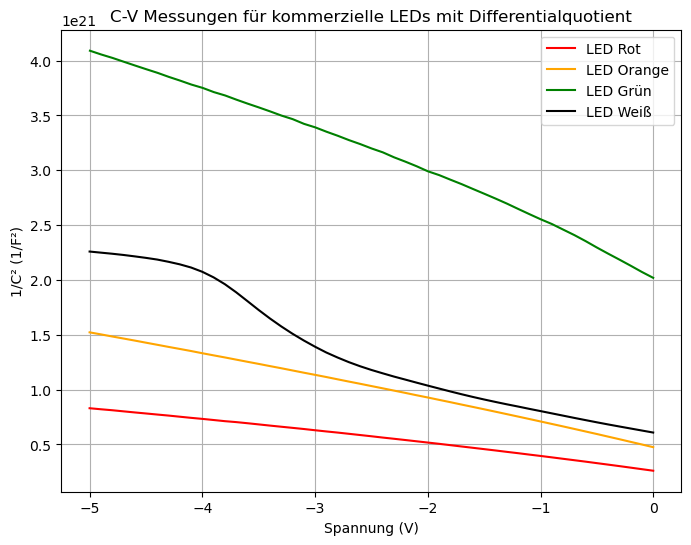

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Konstanten
e = 1.602e-19  # Elementarladung in Coulomb
permittivity = {
    'GaAs': 13.1 * 8.854e-12,  # Permittivität von GaAs in F/m
    'GaN': 8.9 * 8.854e-12    # Permittivität von GaN in F/m
}

# Flächen in Quadratmeter umrechnen
areas = {
    'CV_rot.csv': 921600 * 1e-12,
    'CV_orange.csv': 1000000 * 1e-12,
    'CV_gruen.csv': 2250000 * 1e-12,
    'CV_weiss.csv': 2250000 * 1e-12
}

# Materialzuordnung
material_map = {
    'CV_rot.csv': 'GaAs',
    'CV_orange.csv': 'GaAs',
    'CV_gruen.csv': 'GaN',
    'CV_weiss.csv': 'GaN'
}

ordner_pfad = '/Users/naebaekhap/FP_Protokoll_Kim/FP_Messdaten/F13/Messdaten/3.Aufgabe'
dateien = [f for f in os.listdir(ordner_pfad) if f.endswith('.csv')]

plt.figure(figsize=(8, 6))  # Erstelle eine Figure für die Plots

# Zuordnung von Dateinamen zu Farben und Labels
info = {
    'CV_rot.csv': {'farbe': 'red', 'label': 'LED Rot'},
    'CV_orange.csv': {'farbe': 'orange', 'label': 'LED Orange'},
    'CV_gruen.csv': {'farbe': 'green', 'label': 'LED Grün'},
    'CV_weiss.csv': {'farbe': 'black', 'label': 'LED Weiß'}
}

results = []  # Eine Liste, um die Ergebnisse zu speichern

for datei in dateien:
    if datei in info:
        voller_pfad = os.path.join(ordner_pfad, datei)
        daten = pd.read_csv(voller_pfad, delimiter='\t', skiprows=2, header=None)
        daten.columns = ['Frequency', 'Capacitance', 'Resistance', 'VAC', 'IAC', 'VDC', 'IDC', 'Time', 'Impedance', 'Temperature']
        daten['1/C^2'] = 1 / daten['Capacitance']**2

        farbe = info[datei]['farbe']
        label = info[datei]['label']

        # Plot lines and points
        plt.plot(daten['VDC'], daten['1/C^2'], color=farbe, label=label)

        # Numerische Ableitung
        d_one_over_c2_dv = np.gradient(daten['1/C^2'], daten['VDC'])

        # Berechne N unter Verwendung der numerischen Ableitung
        material = material_map[datei]
        epsilon = permittivity[material]
        area = areas[datei]
        a_diff = np.mean(d_one_over_c2_dv)  # Durchschnitt der numerischen Ableitung verwenden
        N_diff = -2 / (area**2 * e * epsilon * a_diff)

        # Sammeln der Ergebnisse
        results.append({'LED': label, 'Material': material, 'a_diff': a_diff, 'N_diff': N_diff})

# DataFrame erstellen
results_df = pd.DataFrame(results)

# Ergebnisse ausgeben
print(results_df)

plt.title('C-V Messungen für kommerzielle LEDs mit Differentialquotient')
plt.xlabel('Spannung (V)')
plt.ylabel('1/C² (1/F²)')
plt.legend()
plt.grid(True)
plt.show()

